In [1]:
!pip config set global.index-url https://mirrors.aliyun.com/pypi/simple/
!python -m pip install -U pip
!pip -V
!pip install sklearn pandas

Writing to /root/.config/pip/pip.conf
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.4)
pip 20.2.4 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [3]:
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.5
pandas 1.1.3
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_train_all = x_train_all / 255.0
x_test = x_test / 255.0
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


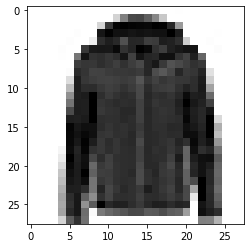

In [5]:
def show_single_img(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()
    
show_single_img(x_train[0])

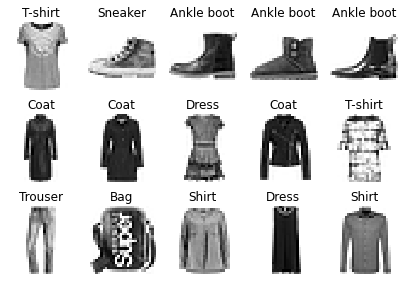

In [6]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col + 1
            plt.subplot(n_rows, n_cols, index)
            plt.imshow(x_data[index], cmap='binary', interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()
    
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)

In [7]:
# tf.keras.Sequential()

'''
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
'''

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3]
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[]
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [8]:
model.layers

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
# [None, 784] * W + b -> [None, 300]
# W.shape = [784 * 300], b.shape = [300]

In [11]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7143 - accuracy: 0.7680 - val_loss: 0.5078 - val_accuracy: 0.8256
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4881 - accuracy: 0.8310 - val_loss: 0.4831 - val_accuracy: 0.8306
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4434 - accuracy: 0.8443 - val_loss: 0.4288 - val_accuracy: 0.8514
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4175 - accuracy: 0.8541 - val_loss: 0.4028 - val_accuracy: 0.8612
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3968 - accuracy: 0.8597 - val_loss: 0.3903 - val_accuracy: 0.8650
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3819 - accuracy: 0.8665 - val_loss: 0.3839 - val_accuracy: 0.8624
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3675 - accuracy: 0.8699 - val_loss: 0.3695 - val_accuracy:

In [12]:
type(history)

tensorflow.python.keras.callbacks.History

In [13]:
history.history

{'loss': [0.7143206596374512,
  0.48812514543533325,
  0.44344562292099,
  0.4175386130809784,
  0.39684250950813293,
  0.3818516433238983,
  0.36747559905052185,
  0.3559931814670563,
  0.34594953060150146,
  0.3356488347053528],
 'accuracy': [0.7679818272590637,
  0.8309817910194397,
  0.8442909121513367,
  0.8541454672813416,
  0.8596727252006531,
  0.866527259349823,
  0.8699091076850891,
  0.8753818273544312,
  0.8767818212509155,
  0.8800181746482849],
 'val_loss': [0.5077696442604065,
  0.483140230178833,
  0.42876753211021423,
  0.402811199426651,
  0.3902735114097595,
  0.3838731348514557,
  0.3695113956928253,
  0.3536204993724823,
  0.35639286041259766,
  0.34880387783050537],
 'val_accuracy': [0.8256000280380249,
  0.8306000232696533,
  0.8514000177383423,
  0.8611999750137329,
  0.8650000095367432,
  0.8623999953269958,
  0.8682000041007996,
  0.8759999871253967,
  0.8744000196456909,
  0.878000020980835]}

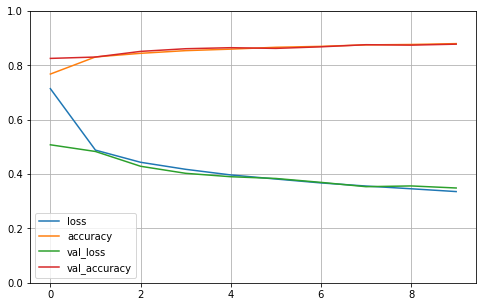

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)